In [7]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
sns.set_theme(color_codes=True)

In [4]:
df=pd.read_csv("B1-Procesamiento-de-Datos-con-Python-RT-master/países.csv")
df.head()

,code,continent,country,date,total_cases_per_million,total_deaths_per_million,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,hdi
0,AFG,Asia,Afghanistan,09/12/2021,3955.901,183.781,54.422,597.029,9.59,64.83,0.511
1,ALB,Europe,Albania,09/12/2021,70611.786,1088.782,104.871,304.195,10.08,78.57,0.795
2,DZA,Africa,Algeria,09/12/2021,4756.612,137.303,17.348,278.364,6.73,76.88,0.748
3,AND,Europe,Andorra,09/12/2021,249140.316,1719.368,163.755,109.135,7.97,83.73,0.868
4,AGO,Africa,Angola,09/12/2021,1925.701,51.159,23.890,276.045,3.94,61.15,0.581


<AxesSubplot:xlabel='hdi', ylabel='total_cases_per_million'>

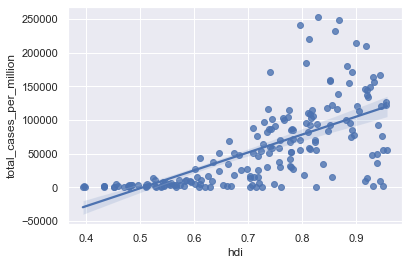

In [5]:
sns.regplot(x="hdi", y="total_cases_per_million", data=df)

<AxesSubplot:xlabel='hdi', ylabel='total_cases_per_million'>

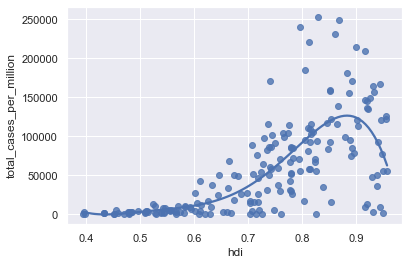

In [6]:
sns.regplot(x="hdi", y="total_cases_per_million", data=df, order=5, ci=None)